In [1]:
import rebound
%matplotlib inline
import matplotlib.pyplot as plt
import observations
import state
import mcmc
import driver
import numpy as np
import hashlib
import corner
from datetime import datetime

In [2]:
label, Niter, Nwalkers, Scale = "simple_emcee_1", 200000, 4, {'a':0.000001, 'm':0.00000001}

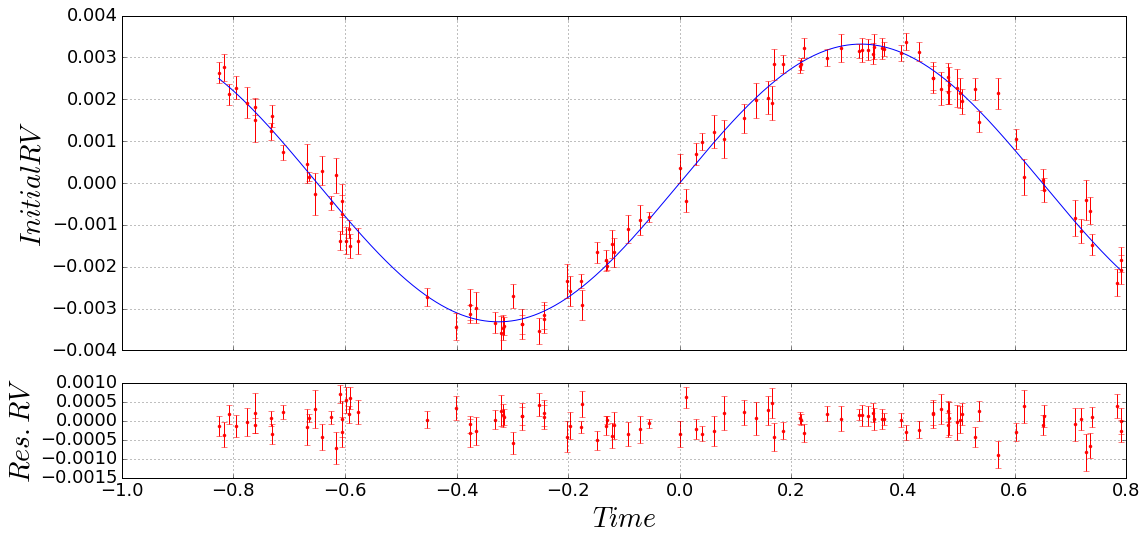

In [3]:
initial_state = state.State(planets= [{'a':0.3500, 'm':0.001965}])
start_state = state.State(planets= [{'a':0.3800, 'm':0.001965}])
obs = driver.createObs(initial_state, 100, 3.0e-4, 9e-5, 1.7)
driver.inLinePlotObs(initial_state, obs, [18,6])

In [4]:
em_bundle, em_h = driver.createEns(label, Niter, start_state, obs, Nwalkers, Scale, printing_every=2000)

Progress: 0.002%, time: 2017-03-01 19:57:37.106054
Progress: 4.002%, time: 2017-03-01 19:58:31.502271
Progress: 8.002%, time: 2017-03-01 19:59:24.738953
Progress: 12.002%, time: 2017-03-01 20:00:18.320821
Progress: 16.002%, time: 2017-03-01 20:01:14.364572
Progress: 20.002%, time: 2017-03-01 20:02:09.140450
Progress: 24.002%, time: 2017-03-01 20:03:08.067867
Progress: 28.002%, time: 2017-03-01 20:04:10.013527
Progress: 32.002%, time: 2017-03-01 20:05:05.910636
Progress: 36.002%, time: 2017-03-01 20:06:06.565894
Progress: 40.002%, time: 2017-03-01 20:07:04.288478
Progress: 44.002%, time: 2017-03-01 20:08:01.343785
Progress: 48.002%, time: 2017-03-01 20:09:04.293119
Progress: 52.002%, time: 2017-03-01 20:10:07.006164
Progress: 56.002%, time: 2017-03-01 20:11:11.219342
Progress: 60.002%, time: 2017-03-01 20:12:16.292102
Progress: 64.002%, time: 2017-03-01 20:13:25.605063
Progress: 68.002%, time: 2017-03-01 20:14:38.238989
Progress: 72.002%, time: 2017-03-01 20:15:51.122879
Progress: 76.00

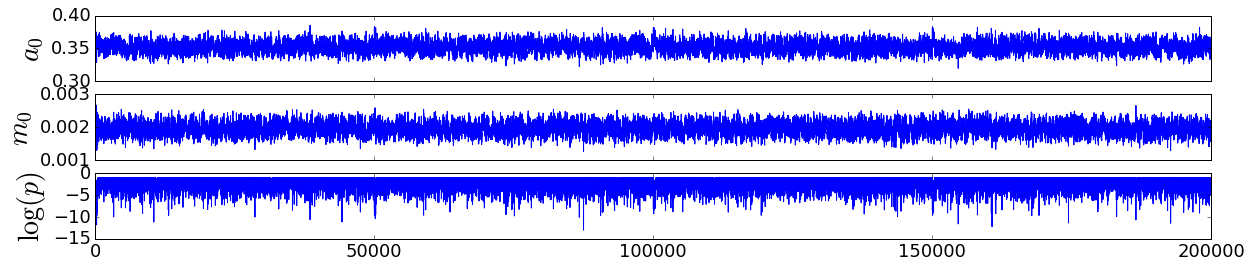

In [12]:
driver.inLinePlotChains(em_bundle, [20,4])

Eliminated burn in, sampled every 2.
Selected some 50 samples to plot.
Resulting average params state (randomly sampledriver.ind):
['$a_0$', '$m_0$']
[ 0.3522061   0.00196272]


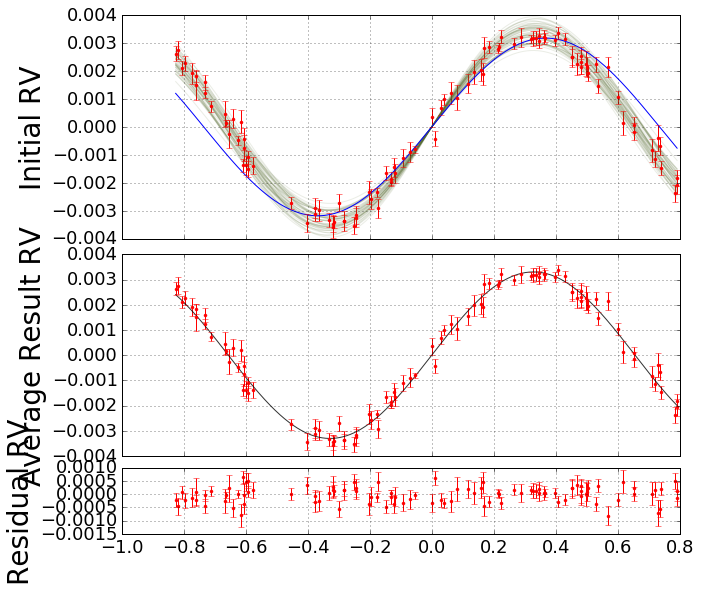

In [13]:
trimmedResEM, trimmedlogpEM = driver.inLinePlotResults(em_bundle, 50, [10,4], 0.5, 2)

AC time 17.5
AC time 17.0


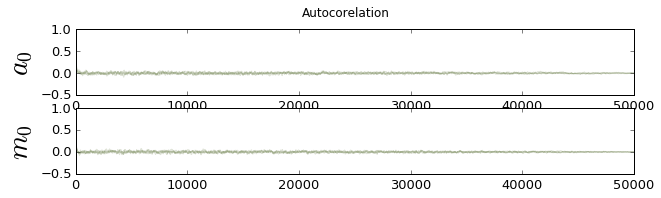

In [14]:
actimesEM = driver.inLinePlotAcTimes(em_bundle, [10, 4])

# Smala

In [8]:
sm_bundle, sm_h = driver.createSMALA(label, Niter/4, start_state, obs, 1.25, 0.14, printing_every=300)

Progress: 0.002%, 4 tries have been made, time: 2017-03-01 20:20:26.709523
Progress: 0.602%, 411 tries have been made, time: 2017-03-01 20:20:34.631891
Progress: 1.202%, 812 tries have been made, time: 2017-03-01 20:20:42.408969
Progress: 1.802%, 1222 tries have been made, time: 2017-03-01 20:20:50.477093
Progress: 2.402%, 1647 tries have been made, time: 2017-03-01 20:20:58.709716
Progress: 3.002%, 2064 tries have been made, time: 2017-03-01 20:21:06.811593
Progress: 3.602%, 2482 tries have been made, time: 2017-03-01 20:21:15.200320
Progress: 4.202%, 2897 tries have been made, time: 2017-03-01 20:21:23.420522
Progress: 4.802%, 3293 tries have been made, time: 2017-03-01 20:21:31.075700
Progress: 5.402%, 3721 tries have been made, time: 2017-03-01 20:21:39.361827
Progress: 6.002%, 4150 tries have been made, time: 2017-03-01 20:21:47.727021
Progress: 6.602%, 4550 tries have been made, time: 2017-03-01 20:21:55.664910
Progress: 7.202%, 4951 tries have been made, time: 2017-03-01 20:22:0

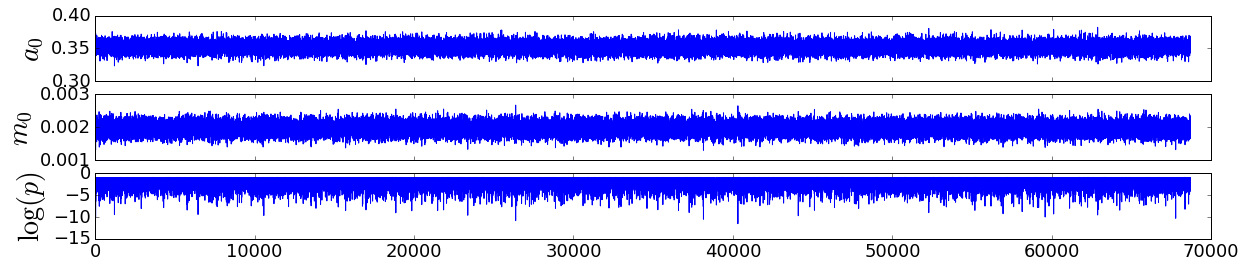

In [9]:
driver.inLinePlotChains(sm_bundle, [20,4])

Eliminated burn in, sampled every 1.
Selected some 50 samples to plot.
Resulting average params state (randomly sampledriver.ind):
['$a_0$', '$m_0$']
[ 0.35204081  0.00195554]


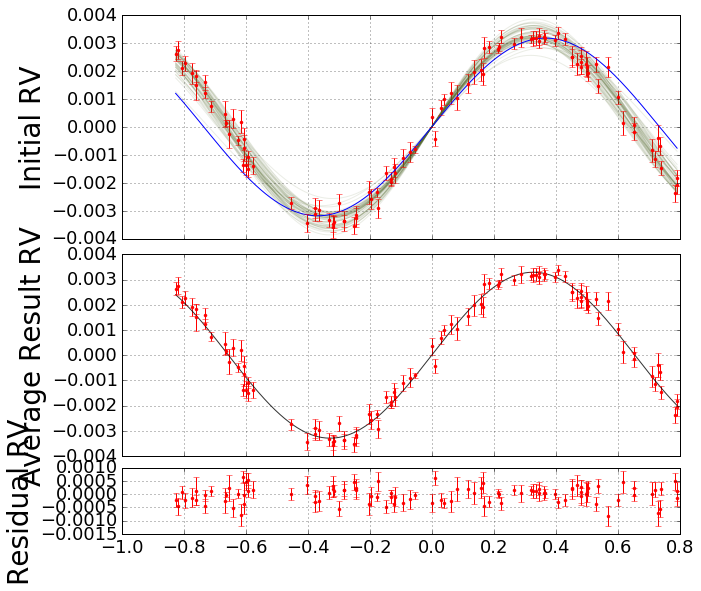

In [10]:
trimmedResSM, trimmedlogpSM = driver.inLinePlotResults(sm_bundle, 50, [10,4], 0.3, 1)

AC time 1.0
AC time 1.0


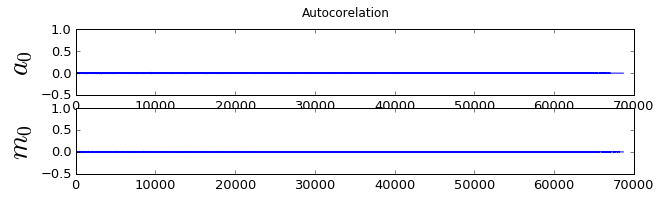

In [11]:
actimesSM = driver.inLinePlotAcTimes(sm_bundle, [10,4])

# Comparison

In [15]:
from scipy import stats

def showCDF(chain1, chain2, size):
    for i in range(len(np.transpose(chain1))):
        fig = plt.figure(figsize=(size[0],size[1]))
        plt.plot(sorted(np.transpose(chain1)[i]), np.linspace(0,1, len(np.transpose(chain1)[i])))
        plt.plot(sorted(np.transpose(chain2)[i]), np.linspace(0,1, len(np.transpose(chain2)[i])))
        plt.ylabel('Fractionsl CDF')
        
def calcKStatistic(chain1, chain2):
    for i in range(len(np.transpose(chain1))):
        print stats.ks_2samp(np.transpose(chain1)[i], np.transpose(chain2)[i])

In [16]:
calcKStatistic(sm_bundle.mcmc_chain, em_bundle.mcmc_chain)

Ks_2sampResult(statistic=0.0090191252201504701, pvalue=0.00048318034943983448)
Ks_2sampResult(statistic=0.015376524314804296, pvalue=6.1380946561239864e-11)


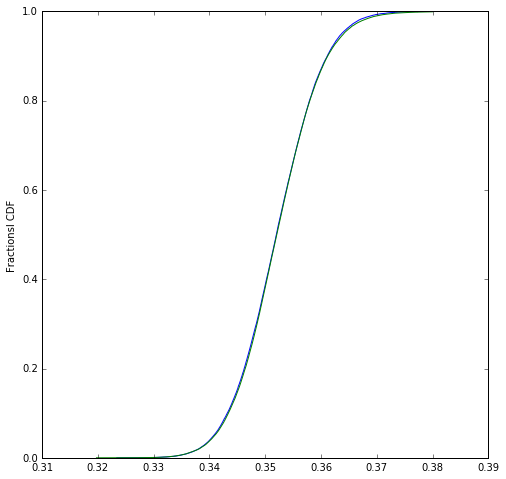

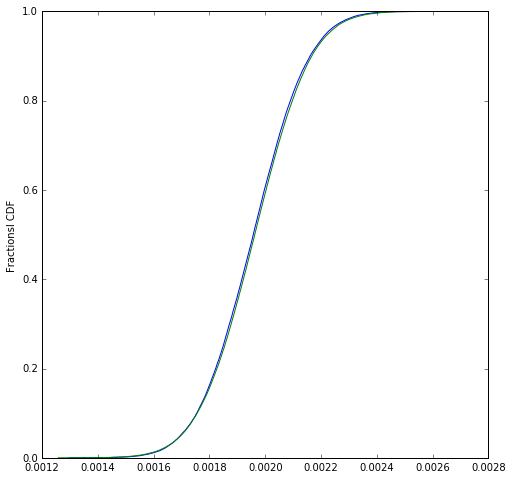

In [17]:
showCDF(sm_bundle.mcmc_chain, em_bundle.mcmc_chain, [8,8])

In [18]:
calcKStatistic(trimmedResSM, trimmedResEM)

Ks_2sampResult(statistic=0.018874285714285732, pvalue=8.3135740953814203e-07)
Ks_2sampResult(statistic=0.025248571428571398, pvalue=7.6168288766138675e-12)


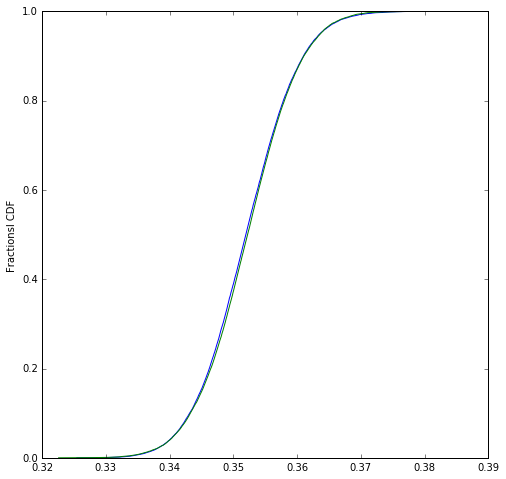

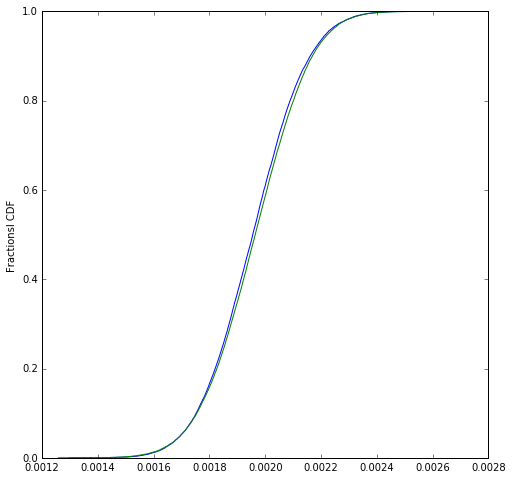

In [19]:
showCDF(trimmedResSM, trimmedResEM, [8,8])